In [ ]:
import pandas as pd

In [ ]:
aapl_data=pd.read_csv("AAPL.csv",parse_dates=True,index_col='Date')

In [ ]:
allDates=pd.date_range(start=min(aapl_data.index),end=max(aapl_data.index),freq="D")

In [ ]:
aapl_data.reindex(allDates[allDates.dayofweek<5]).isna().sum()

Open         74
High         74
Low          74
Close        74
Adj Close    74
Volume       74
dtype: int64

In [ ]:
allDates=pd.date_range(start=min(aapl_data.index),end=max(aapl_data.index),freq="D")

In [ ]:
aapl_data.reindex(allDates[allDates.dayofweek<5]).isna().sum()

Open         74
High         74
Low          74
Close        74
Adj Close    74
Volume       74
dtype: int64

In [ ]:
aapl_data_missingdates=aapl_data.reindex(allDates[allDates.dayofweek<5])

In [ ]:
interpolated_data=pd.DataFrame()
interpolated_data['Adj Close']=aapl_data_missingdates['Adj Close'].interpolate()

# **Train Test Split**

In [ ]:
trainData=interpolated_data[interpolated_data.index<"2019-01-01"]

In [ ]:
testData=interpolated_data[interpolated_data.index>="2019-01-01"]

<Axes: >

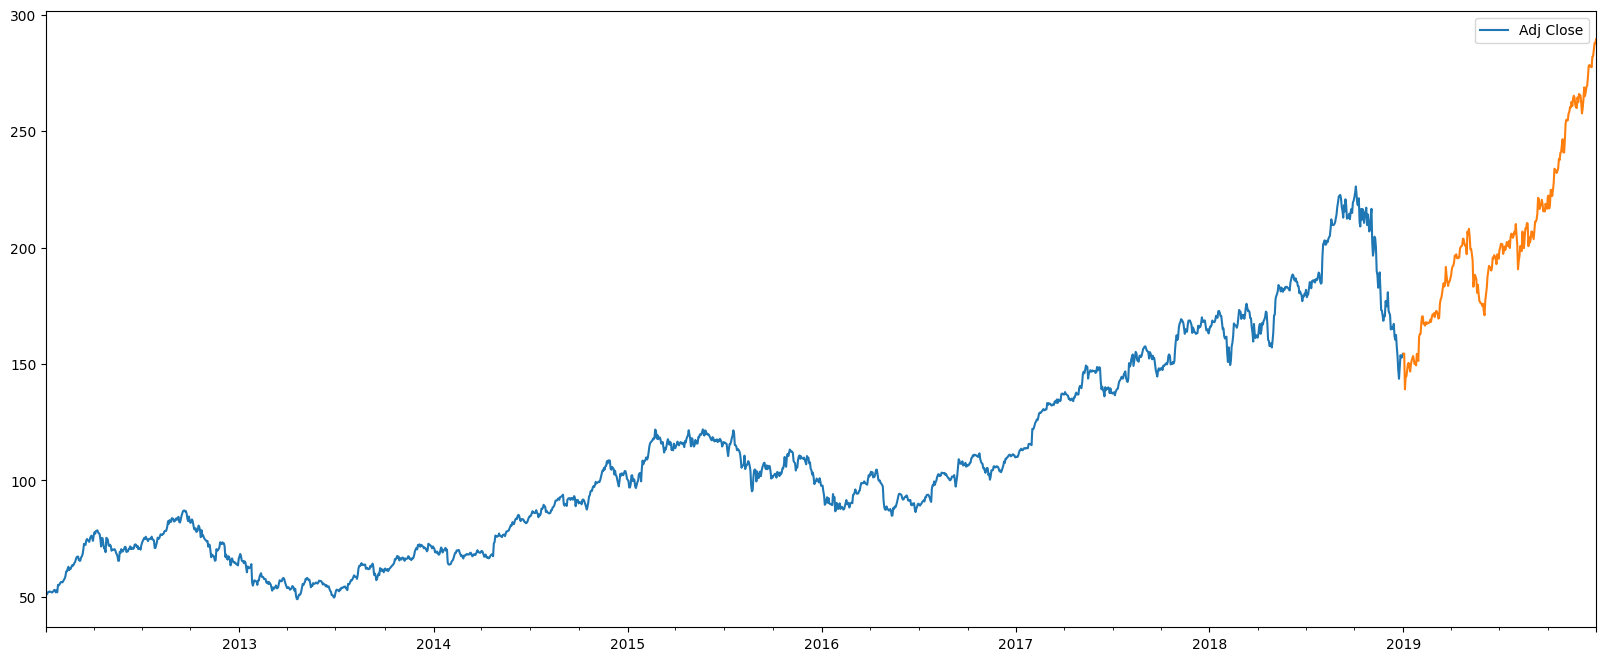

In [ ]:
trainData.plot(y="Adj Close",figsize=(20,8))
testData["Adj Close"].plot()

# **SMA,CMA,WMA,EWMA**

In [ ]:
import numpy as np

df_predicted = trainData.copy()
future_dates = testData.index
df_predicted = df_predicted.append(pd.DataFrame({'date': future_dates}))

sma_window = 30
df_predicted['sma'] = df_predicted['Adj Close'].rolling(window=sma_window).mean()

df_predicted.loc[df_predicted['Adj Close'].isnull(), 'Adj Close'] = df_predicted.loc[df_predicted['Adj Close'].isnull(), 'sma']

for i in range(len(trainData), len(df_predicted)):
    last_prices = df_predicted['Adj Close'].iloc[i-sma_window:i]
    df_predicted['Adj Close'].iloc[i] = last_prices.mean()

print(df_predicted.tail(10))

      Adj Close       date  sma
250  159.649729 2019-12-17  NaN
251  159.649729 2019-12-18  NaN
252  159.649729 2019-12-19  NaN
253  159.649729 2019-12-20  NaN
254  159.649730 2019-12-23  NaN
255  159.649730 2019-12-24  NaN
256  159.649730 2019-12-25  NaN
257  159.649730 2019-12-26  NaN
258  159.649730 2019-12-27  NaN
259  159.649730 2019-12-30  NaN


<ipython-input-12-5f301412aa70>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_predicted = df_predicted.append(pd.DataFrame({'date': future_dates}))
/usr/local/lib/python3.9/dist-packages/pandas/core/indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
<ipython-input-12-5f301412aa70>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predicted['Adj Close'].iloc[i] = last_prices.mean()


In [ ]:
test_predicted=df_predicted[-len(testData):]

In [ ]:
test_predicted.index=testData.index

<Axes: >

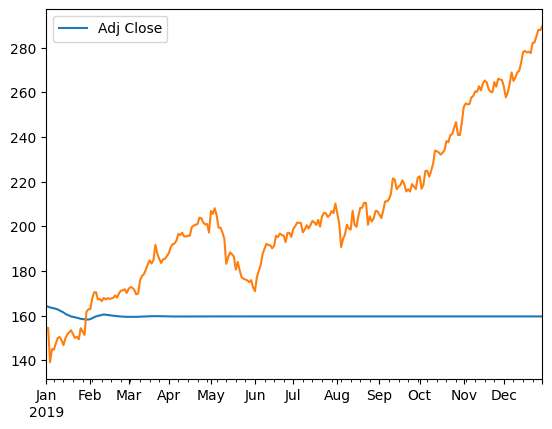

In [ ]:
test_predicted.plot(y="Adj Close")
testData["Adj Close"].plot()

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,mean_absolute_error
from math import sqrt

In [ ]:
mse = mean_squared_error(test_predicted['Adj Close'],testData['Adj Close'])
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test_predicted['Adj Close'],testData['Adj Close'])
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test_predicted['Adj Close'],testData['Adj Close'])
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  3288.377412280199
Root Mean Squared Error (RMSE) =  57.34
Mean Absolute Error (MAE)  =  47.14117415112629
Mean Absolute Percentage Error (MAPE)  =  0.29520695077160164


In [ ]:
df_predicted = trainData.copy()
future_dates=testData.index
df_predicted = df_predicted.append(pd.DataFrame({'date': future_dates}))

sma_window = 30
df_predicted['cma'] = df_predicted['Adj Close'].expanding().mean()

df_predicted.loc[df_predicted['Adj Close'].isnull(), 'Adj Close'] = df_predicted.loc[df_predicted['Adj Close'].isnull(), 'cma']

print(df_predicted.tail(10))

      Adj Close       date         cma
250  107.219645 2019-12-17  107.219645
251  107.219645 2019-12-18  107.219645
252  107.219645 2019-12-19  107.219645
253  107.219645 2019-12-20  107.219645
254  107.219645 2019-12-23  107.219645
255  107.219645 2019-12-24  107.219645
256  107.219645 2019-12-25  107.219645
257  107.219645 2019-12-26  107.219645
258  107.219645 2019-12-27  107.219645
259  107.219645 2019-12-30  107.219645


<ipython-input-18-ea39ab60513b>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_predicted = df_predicted.append(pd.DataFrame({'date': future_dates}))
/usr/local/lib/python3.9/dist-packages/pandas/core/indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


In [ ]:
test_predicted=df_predicted[-len(testData):]

In [ ]:
test_predicted.index=testData.index

<Axes: >

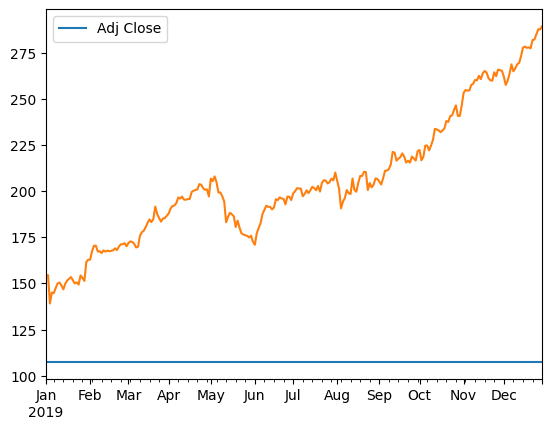

In [ ]:
test_predicted.plot(y="Adj Close")
testData["Adj Close"].plot()

In [ ]:
mse = mean_squared_error(test_predicted['Adj Close'],testData['Adj Close'])
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test_predicted['Adj Close'],testData['Adj Close'])
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test_predicted['Adj Close'],testData['Adj Close'])
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  10800.547208222131
Root Mean Squared Error (RMSE) =  103.93
Mean Absolute Error (MAE)  =  97.88551943376712
Mean Absolute Percentage Error (MAPE)  =  0.9129438867454841


In [ ]:
df_predicted = trainData.copy()
future_dates=testData.index
df_predicted = df_predicted.append(pd.DataFrame({'date': future_dates}))

df_predicted['ewma'] = df_predicted['Adj Close'].ewm(alpha=0.1).mean()

df_predicted.loc[df_predicted['Adj Close'].isnull(), 'Adj Close'] = df_predicted.loc[df_predicted['Adj Close'].isnull(), 'ewma']

print(df_predicted.tail(10))

      Adj Close       date        ewma
250  159.065216 2019-12-17  159.065216
251  159.065216 2019-12-18  159.065216
252  159.065216 2019-12-19  159.065216
253  159.065216 2019-12-20  159.065216
254  159.065216 2019-12-23  159.065216
255  159.065216 2019-12-24  159.065216
256  159.065216 2019-12-25  159.065216
257  159.065216 2019-12-26  159.065216
258  159.065216 2019-12-27  159.065216
259  159.065216 2019-12-30  159.065216


<ipython-input-23-e57a5d5d2e8a>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_predicted = df_predicted.append(pd.DataFrame({'date': future_dates}))
/usr/local/lib/python3.9/dist-packages/pandas/core/indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


In [ ]:
test_predicted=df_predicted[-len(testData):]

In [ ]:
test_predicted.index=testData.index

<Axes: >

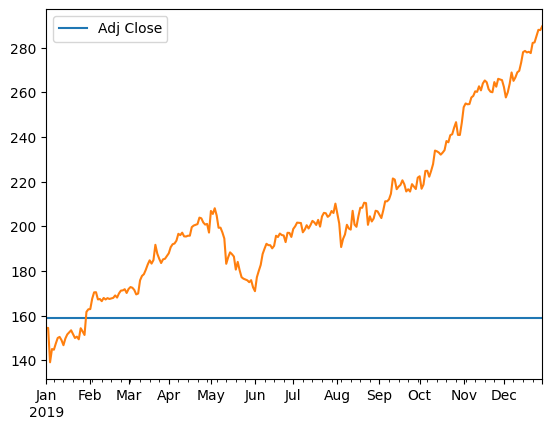

In [ ]:
test_predicted.plot(y="Adj Close")
testData["Adj Close"].plot()

In [ ]:
mse = mean_squared_error(test_predicted['Adj Close'],testData['Adj Close'])
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test_predicted['Adj Close'],testData['Adj Close'])
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test_predicted['Adj Close'],testData['Adj Close'])
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  3338.6491103370226
Root Mean Squared Error (RMSE) =  57.78
Mean Absolute Error (MAE)  =  47.50957272654622
Mean Absolute Percentage Error (MAPE)  =  0.298679835924151


<Axes: >

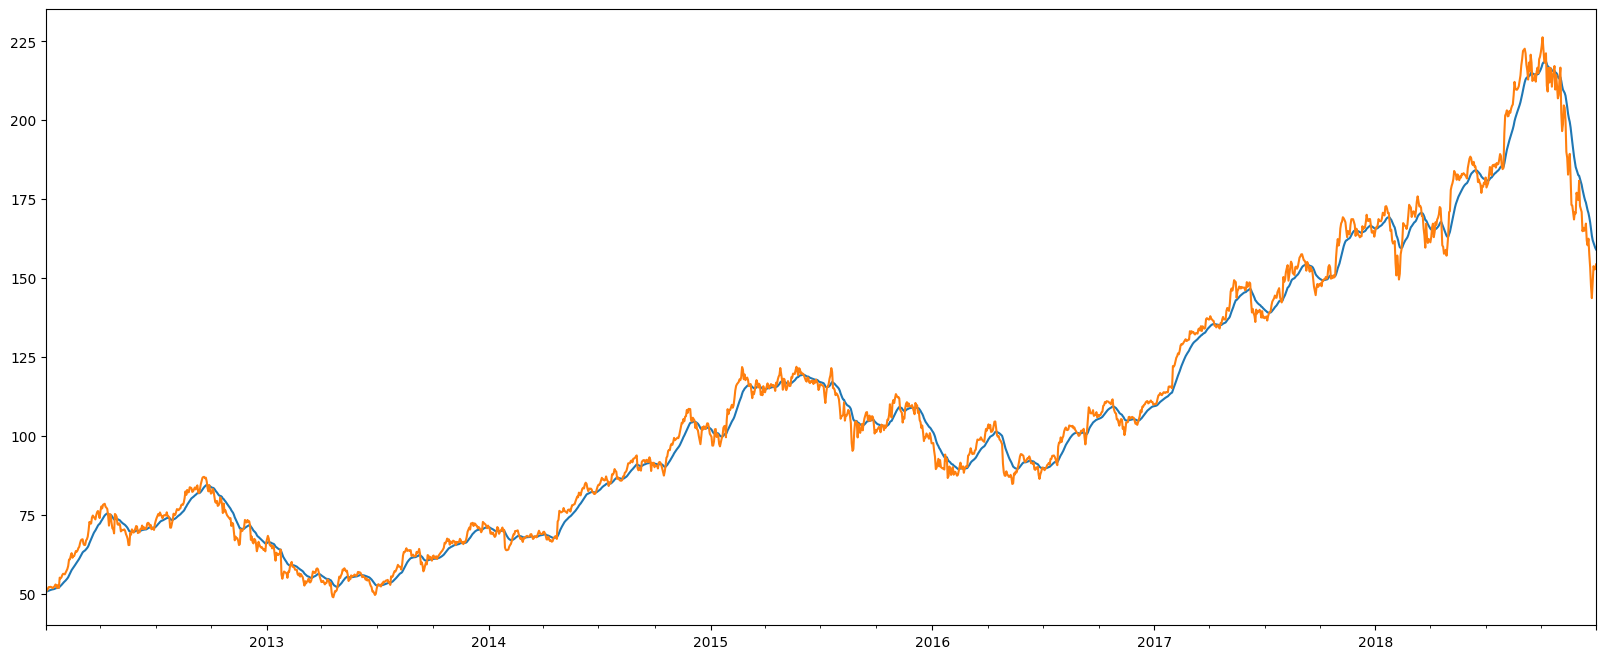

In [ ]:
ewma=pd.DataFrame()
ewma["EMA_0.1"]=trainData['Adj Close'].ewm(alpha=0.1,adjust=False).mean()

ewma["EMA_0.1"].plot(figsize=(20,8))
trainData["Adj Close"].plot()

# **Make Data Stationary**

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(trainData)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.260715
p-value: 0.646948


the p value is greater than 0.05 so the data is non stationary

**Doing Log Transformation to make data stationary**

In [ ]:
import numpy as np

logTrainData=np.log(trainData)
result = adfuller(logTrainData)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.365735
p-value: 0.598588


it is decreased a little but data is not still stationary

**Performing Squareroot transformation**

In [ ]:
sqrtData=np.sqrt(trainData)
result = adfuller(sqrtData)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.152656
p-value: 0.693623


it had increased non stationarity with square root

**Lets perform Box Cox transformation**

In [ ]:
from scipy.stats import boxcox

transformed_data, lambda_value = boxcox(trainData['Adj Close'])

In [ ]:

result = adfuller(transformed_data)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.540778
p-value: 0.513251


not good with transformation lets try **Differenciation**

In [ ]:
for i in range(1,50):
  transformData=trainData.diff(i)
  result = adfuller(transformData.dropna())

  print(f"p-value: { result[1]},at index {i}")

p-value: 1.3341054072513458e-10,at index 1
p-value: 2.6825984772699946e-10,at index 2
p-value: 1.2293829793218126e-09,at index 3
p-value: 1.3572663357318076e-08,at index 4
p-value: 1.5194685315199988e-07,at index 5
p-value: 3.966098834275242e-08,at index 6
p-value: 1.0074629183305102e-09,at index 7
p-value: 1.498335825996641e-07,at index 8
p-value: 3.253508128364593e-10,at index 9
p-value: 7.019387421460536e-08,at index 10
p-value: 6.540880325731487e-08,at index 11
p-value: 6.286482260663946e-07,at index 12
p-value: 1.864546500610738e-13,at index 13
p-value: 8.441847561156893e-12,at index 14
p-value: 1.7618275445020582e-10,at index 15
p-value: 4.637478652950434e-10,at index 16
p-value: 3.774953767091419e-08,at index 17
p-value: 1.653594658266849e-06,at index 18
p-value: 5.457514813070125e-06,at index 19
p-value: 6.588825106002823e-06,at index 20
p-value: 0.0002798068767511937,at index 21
p-value: 0.00013394207123615016,at index 22
p-value: 0.00042797014260905966,at index 23
p-value: 4.

differensiation worked we got perfectly non stationary data at index i

In [ ]:
stationaryData=trainData.diff(1)
stationaryData=stationaryData.dropna()
result = adfuller(stationaryData)
print(f"p-value: { result[1]}")

p-value: 1.3341054072513458e-10


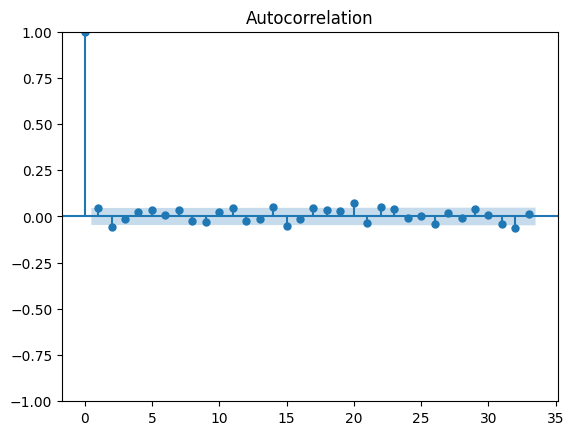

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf=plot_acf(stationaryData)

q=0

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


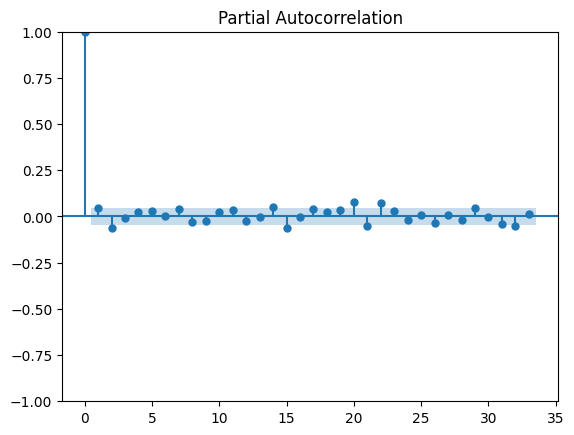

In [ ]:
pacf=plot_pacf(stationaryData)

p is 0

d=1

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model=ARIMA(trainData,order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                 1825
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3610.202
Date:                Tue, 04 Apr 2023   AIC                           7226.403
Time:                        04:19:03   BIC                           7242.929
Sample:                    01-03-2012   HQIC                          7232.500
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4968      0.147     -3.382      0.001      -0.785      -0.209
ma.L1          0.5549      0.143      3.885      0.000       0.275       0.835
sigma2         3.0669      0.047     65.275      0.000       2.975       3.159
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):              4411.57
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               4.15   Skew:                            -0.50
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
prediction_train=model_fit.predict(min(trainData.index),max(trainData.index))

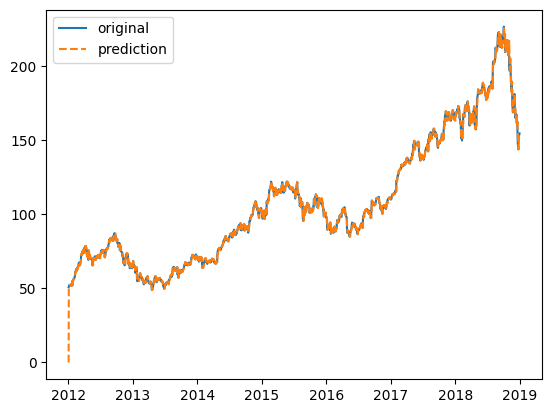

In [ ]:
import matplotlib.pyplot as plt

plt.plot(trainData.index,trainData['Adj Close'],label="original")
plt.plot(prediction_train.index,prediction_train,ls="--",label="prediction")
plt.legend(loc="best")
plt.show()

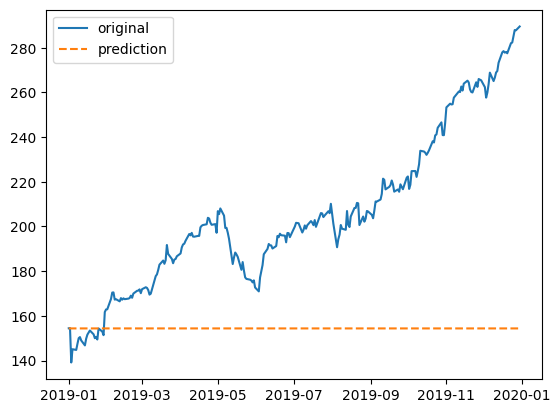

In [ ]:
prediction_test=model_fit.predict(min(testData.index),max(testData.index))
plt.plot(testData.index,testData['Adj Close'],label="original")
plt.plot(prediction_test.index,prediction_test,ls="--",label="prediction")
plt.legend(loc="best")
plt.show()

it clearly didin't understand test data but it is understood training data it is clear case of overfitting

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(trainData, prediction_train))

2.115982204787107

In [ ]:
for i in range(1,50):
  transformData=logTrainData.diff(i)
  result = adfuller(transformData.dropna())

  print(f"p-value: { result[1]},at index {i}")

p-value: 0.0,at index 1
p-value: 1.1268495372303326e-12,at index 2
p-value: 5.0039417344070366e-11,at index 3
p-value: 5.856160522979519e-10,at index 4
p-value: 6.264675946349696e-09,at index 5
p-value: 9.50509951453111e-09,at index 6
p-value: 1.9093719594298083e-09,at index 7
p-value: 5.0002146234652744e-08,at index 8
p-value: 4.722382466480612e-10,at index 9
p-value: 9.23352323376063e-09,at index 10
p-value: 4.3758537229950363e-08,at index 11
p-value: 3.2636234995096295e-07,at index 12
p-value: 5.656894366307466e-12,at index 13
p-value: 2.0539042788201817e-11,at index 14
p-value: 9.771421231239964e-10,at index 15
p-value: 2.2928003999746253e-09,at index 16
p-value: 3.4330048400866104e-08,at index 17
p-value: 4.769696340835744e-07,at index 18
p-value: 1.974027583852519e-07,at index 19
p-value: 3.910386074604902e-07,at index 20
p-value: 2.3166916803959893e-06,at index 21
p-value: 3.1905467383274804e-06,at index 22
p-value: 8.31604588222238e-06,at index 23
p-value: 6.689113773704587e-06

In [ ]:
log_transform_data_train=logTrainData.diff(1)
log_transform_data_train=log_transform_data_train.dropna()

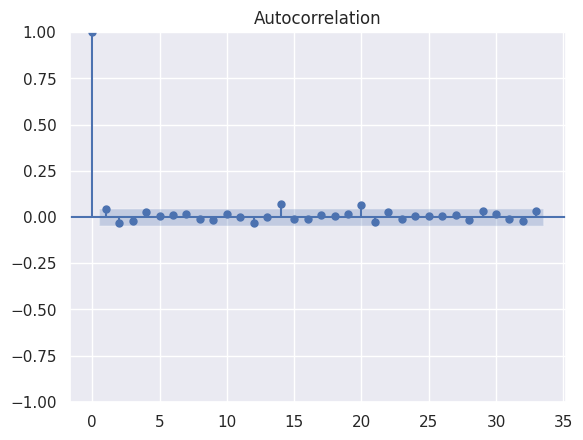

In [ ]:
import seaborn as sns
sns.set()
acf=plot_acf(log_transform_data_train)

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


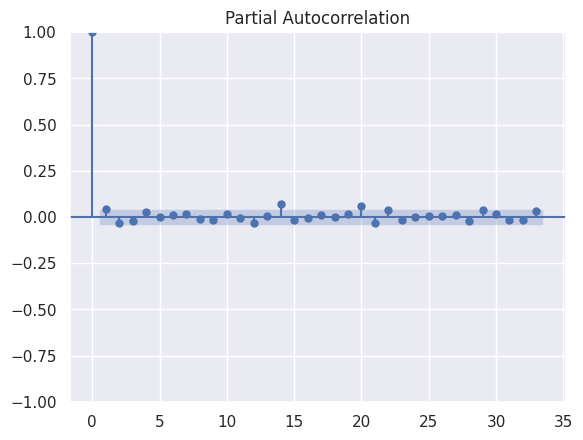

In [ ]:
pacf=plot_pacf(log_transform_data_train)

In [ ]:
model=ARIMA(logTrainData,order=(0,1,0))
model_fit=model.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


In [ ]:
log_transform_train_prediction=model_fit.predict(min(trainData.index),max(trainData.index))

In [ ]:
train_prediction=np.exp(log_transform_train_prediction)

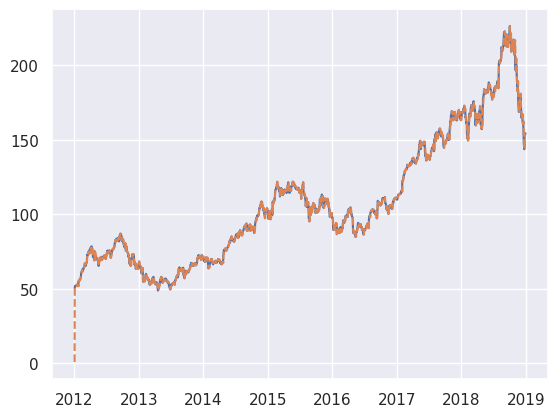

In [ ]:
plt.plot(trainData.index,trainData['Adj Close'],label="original")
plt.plot(train_prediction.index,train_prediction,ls="--",label="prediction")
plt.show()

In [ ]:
log_transform_test_prediction=model_fit.predict(min(testData.index),max(testData.index))

In [ ]:
test_prediction=np.exp(log_transform_test_prediction)

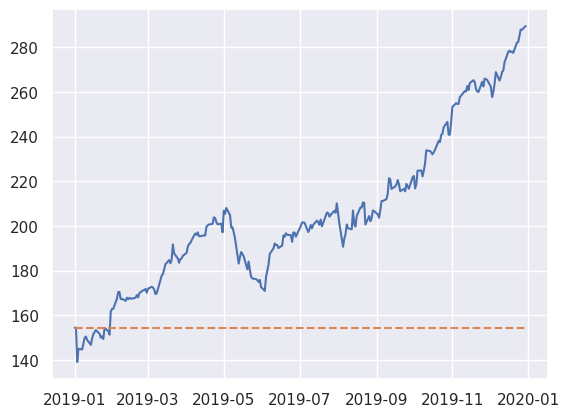

In [ ]:
plt.plot(testData.index,testData['Adj Close'],label="original")
plt.plot(test_prediction.index,test_prediction,ls="--",label="prediction")
plt.show()

it didn't understood testing data as well

In [ ]:
for i in range(1,50):
  transformData=sqrtData.diff(i)
  result = adfuller(transformData.dropna())

  print(f"p-value: { result[1]},at index {i}")

p-value: 0.0,at index 1
p-value: 2.933573519941397e-11,at index 2
p-value: 2.1882446919263738e-10,at index 3
p-value: 2.4250941874316003e-09,at index 4
p-value: 2.6098491849301183e-08,at index 5
p-value: 1.503437516338643e-08,at index 6
p-value: 5.429293425765018e-10,at index 7
p-value: 6.783388366190495e-08,at index 8
p-value: 3.254427181319379e-10,at index 9
p-value: 3.345636483780726e-08,at index 10
p-value: 4.415611267823833e-08,at index 11
p-value: 4.0770623798085785e-07,at index 12
p-value: 7.11375299862695e-13,at index 13
p-value: 1.0273264531635984e-11,at index 14
p-value: 7.037229619191798e-10,at index 15
p-value: 1.099301149878317e-09,at index 16
p-value: 3.647441352599296e-08,at index 17
p-value: 6.96046727544698e-07,at index 18
p-value: 1.552084702622409e-06,at index 19
p-value: 2.3698374098681794e-06,at index 20
p-value: 2.1230892699705686e-05,at index 21
p-value: 7.408170059214478e-06,at index 22
p-value: 2.972331019506257e-05,at index 23
p-value: 1.855282134430768e-05,at

In [ ]:
sqrt_transform_data_train=sqrtData.diff(1)
sqrt_transform_data_train=sqrt_transform_data_train.dropna()

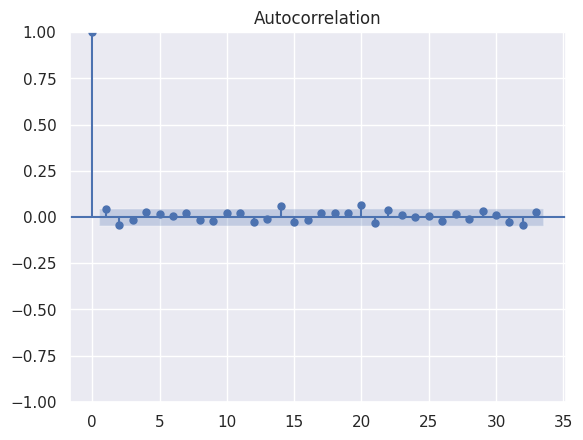

In [ ]:
acf=plot_acf(sqrt_transform_data_train)

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


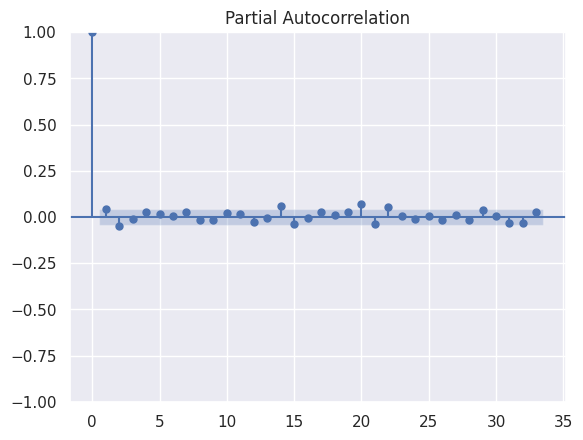

In [ ]:
pacf=plot_pacf(sqrt_transform_data_train)

In [ ]:
model=ARIMA(sqrtData,order=(0,1,0))
model_fit=model.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


In [ ]:
sqrt_transform_train_prediction=model_fit.predict(min(trainData.index),max(trainData.index))

In [ ]:
prediction_train=np.square(sqrt_transform_train_prediction)

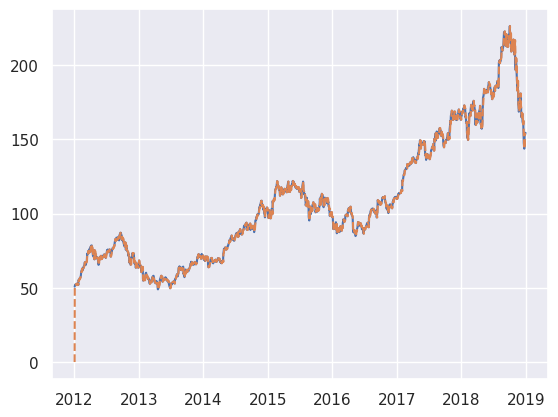

In [ ]:
plt.plot(trainData.index,trainData['Adj Close'],label="original")
plt.plot(prediction_train.index,prediction_train,ls="--",label="prediction")
plt.show()

In [ ]:
sqrt_transform_test_prediction=model_fit.predict(min(testData.index),max(testData.index))

In [ ]:
prediction_test=np.square(sqrt_transform_test_prediction)

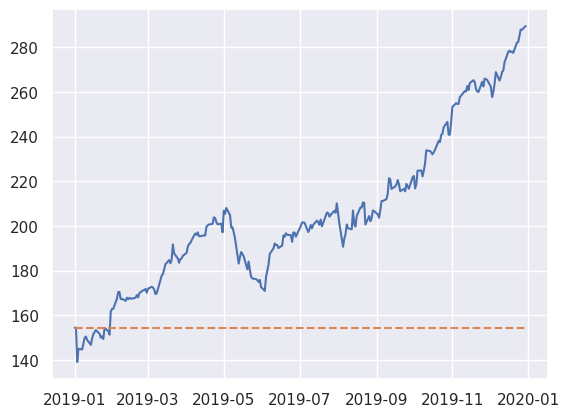

In [ ]:
plt.plot(testData.index,testData['Adj Close'],label="original")
plt.plot(prediction_test.index,prediction_test,ls="--",label="prediction")
plt.show()

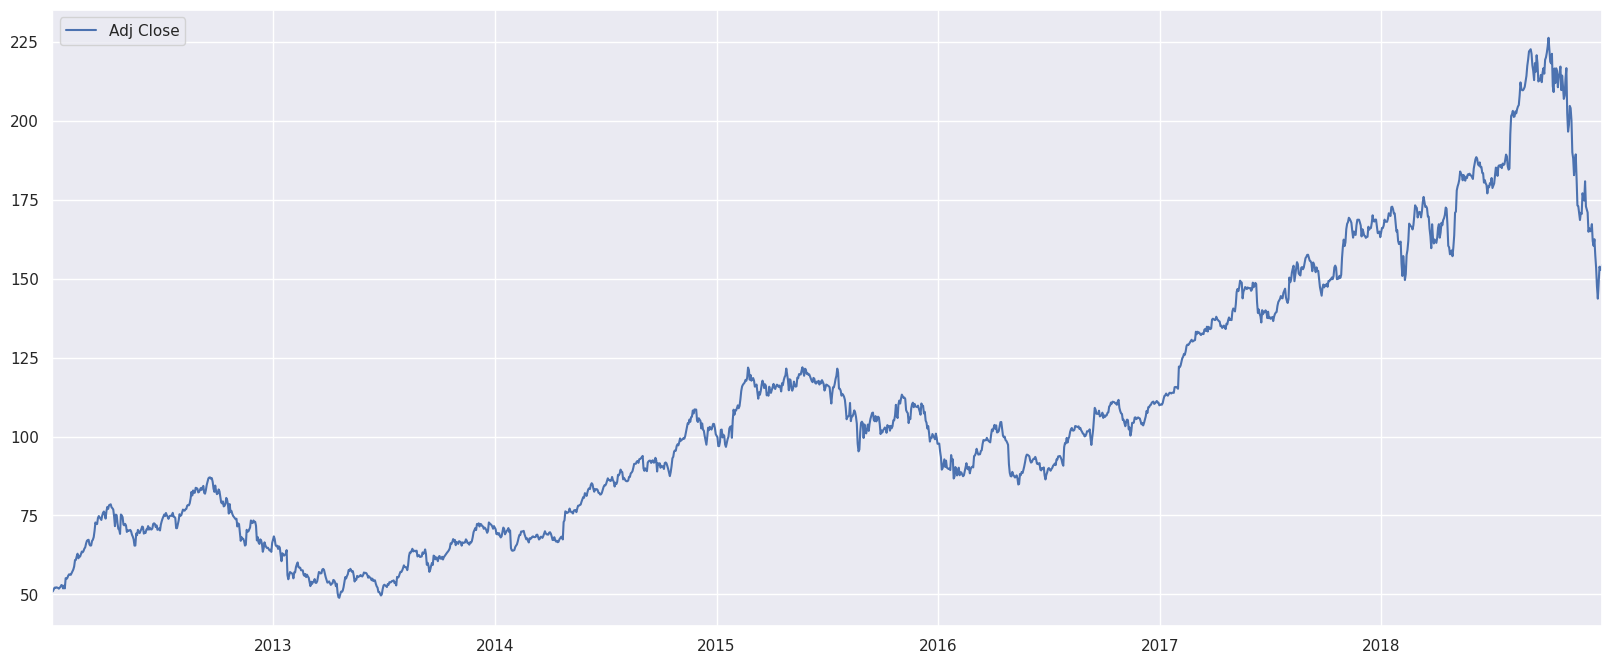

In [ ]:
trainData.plot(figsize=(20,8))
plt.show()

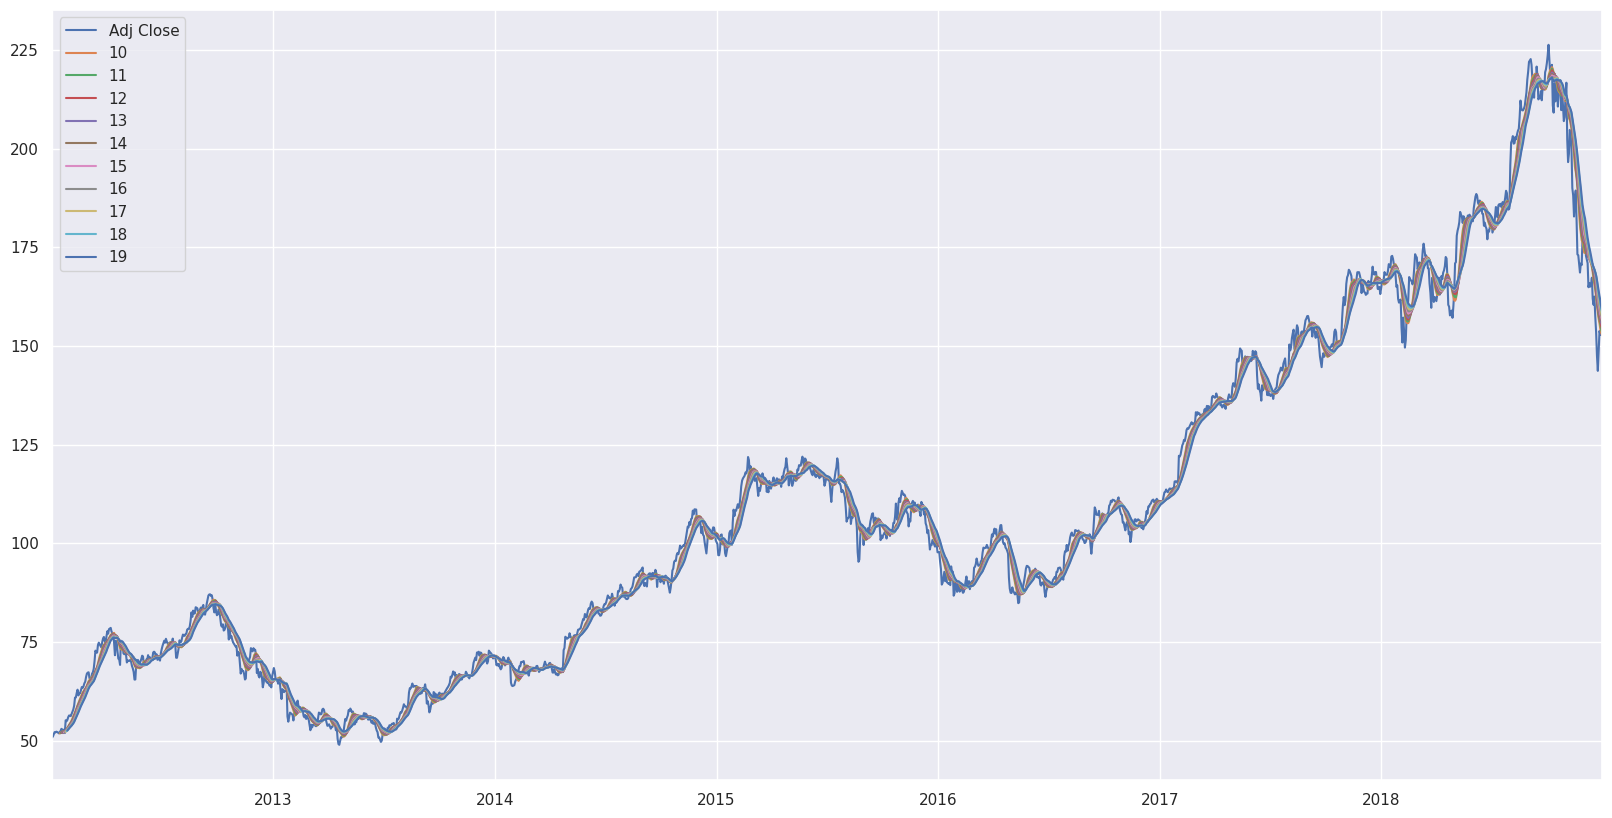

In [ ]:
trainData.plot(y="Adj Close",figsize=(20,10))
for i in range(10,20):
  trainData["Adj Close"].rolling(i).mean().plot(label=f"{i}")
plt.legend(loc="best")


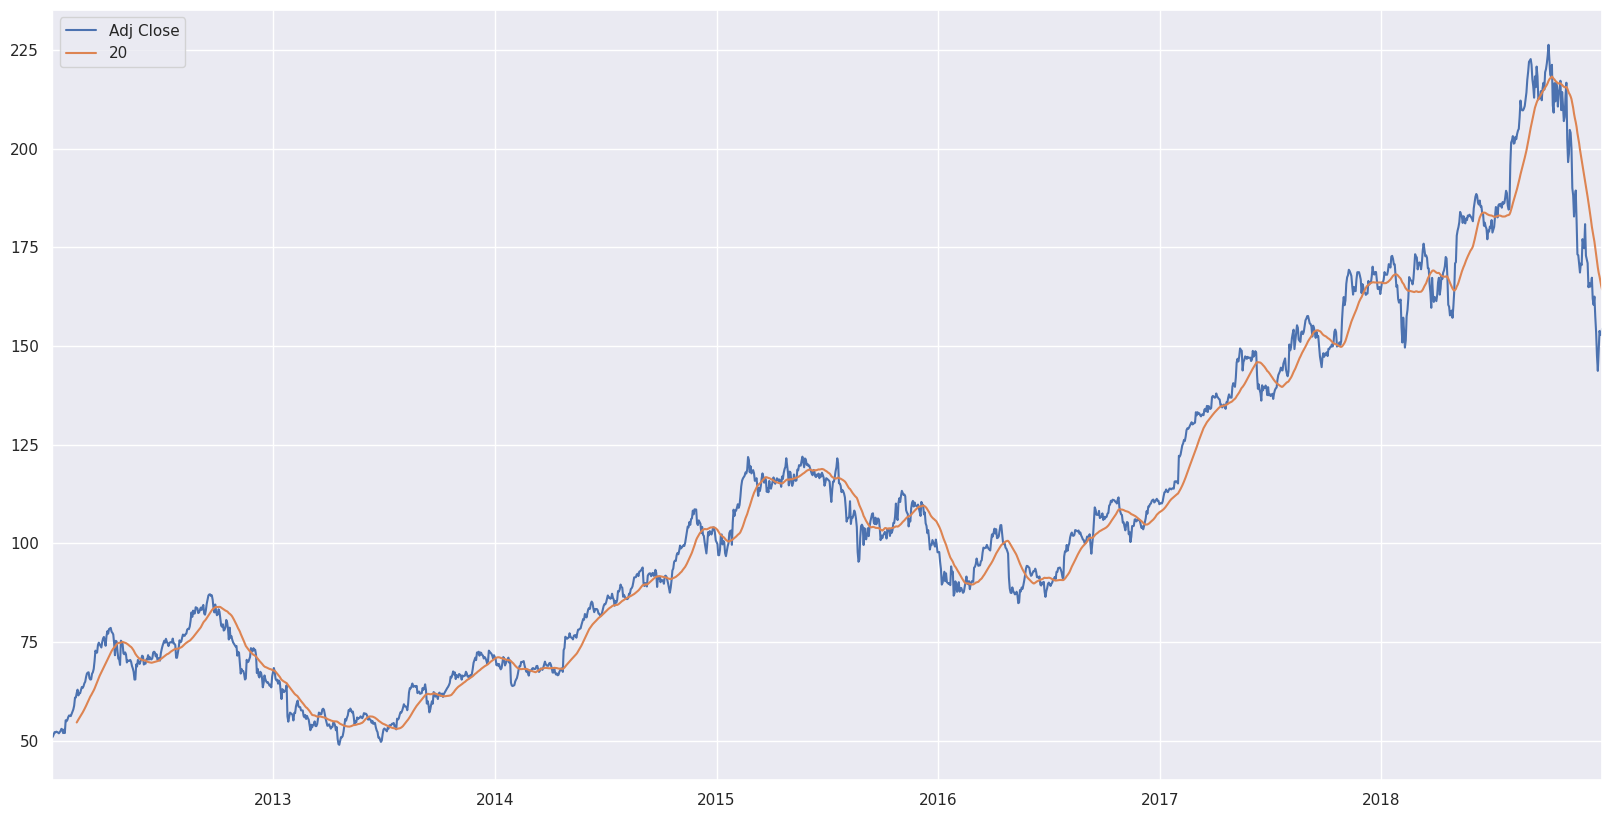

In [ ]:
trainData.plot(y="Adj Close",figsize=(20,10))
trainData["Adj Close"].rolling(30).mean().plot(label=f"20")
plt.legend(loc="best")

In [ ]:
import statsmodels.api as sm
decompose_additive=sm.tsa.seasonal_decompose(trainData,period=30,model="additive")

In [ ]:
import statsmodels.api as sm
decompose_multiplicative=sm.tsa.seasonal_decompose(trainData,period=30,model="multiplicative")

In [ ]:
result_additive = adfuller(decompose_additive.resid.dropna())
result_multiplicative = adfuller(decompose_multiplicative.resid.dropna())

if(result_additive[1]<result_multiplicative[1]):
  print('model is additive')
else:
  print('model is multiplicative')

model is multiplicative


In [ ]:
result_multiplicative[1]

9.65041023830662e-21

residuals are stationary

In [ ]:
residuals=decompose_multiplicative.resid.dropna()

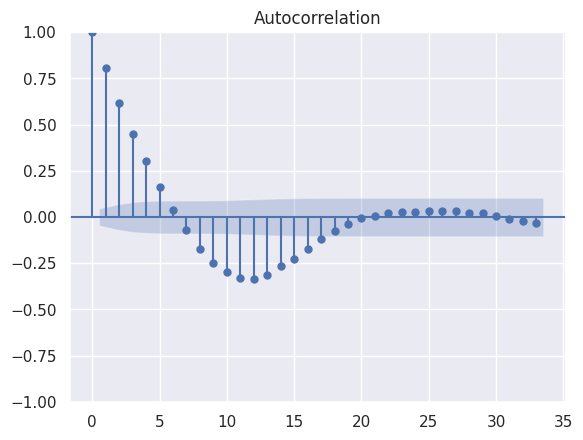

In [ ]:
acf=plot_acf(residuals)

q=5

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


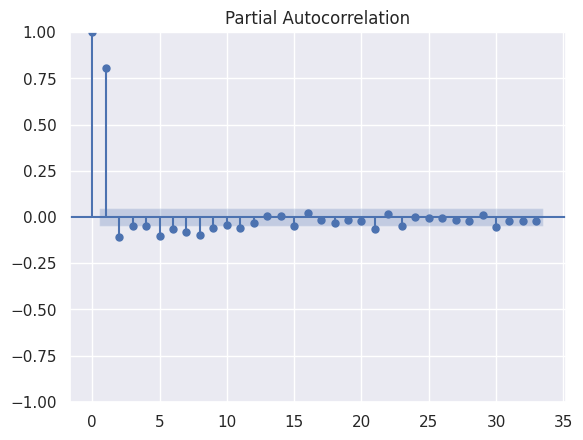

In [ ]:
pacf=plot_pacf(residuals)

p=1

In [ ]:
residuals

2012-01-24    0.948821
2012-01-25    0.998631
2012-01-26    0.990010
2012-01-27    0.990967
2012-01-30    0.993401
                ...   
2018-12-04    1.019350
2018-12-05    1.018970
2018-12-06    1.020952
2018-12-07    0.993570
2018-12-10    1.004530
Name: resid, Length: 1795, dtype: float64

In [ ]:
model=ARIMA(decompose_multiplicative.resid,order=(1,0,5))
model_fit=model.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
predict_train_resid=model_fit.predict(min(trainData.index),max(trainData.index))

In [ ]:
decompose_multiplicative.trend.fillna(decompose_multiplicative.trend.mean(),inplace=True)

In [ ]:
predictData=predict_train_resid*decompose_multiplicative.trend*decompose_multiplicative.seasonal

<Axes: >

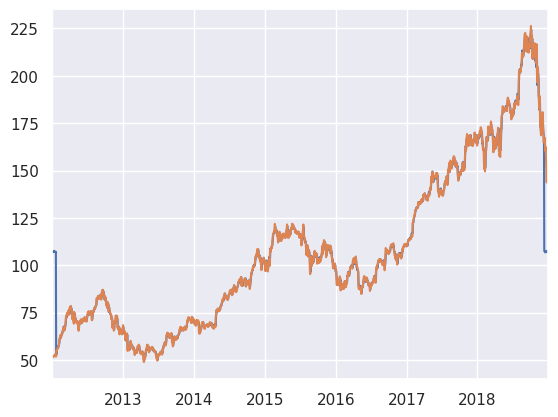

In [ ]:
predictData.plot(y="Adj Close")
trainData['Adj Close'].plot()

In [ ]:
predict_test_resid=model_fit.predict(min(testData.index),max(testData.index))

In [ ]:
trend_test=decompose_multiplicative.trend[(-len(predict_test_resid)):]

In [ ]:
seasonal_test=decompose_multiplicative.seasonal[(-len(predict_test_resid)):]

In [ ]:
test_predict=pd.DataFrame({"trend":trend_test,"seasonal":seasonal_test,"Date":predict_test_resid.index})

In [ ]:
test_predict.set_index('Date',inplace=True)

In [ ]:
predicted_data_test=predict_test_resid*test_predict['trend']*test_predict['seasonal']

<Axes: >

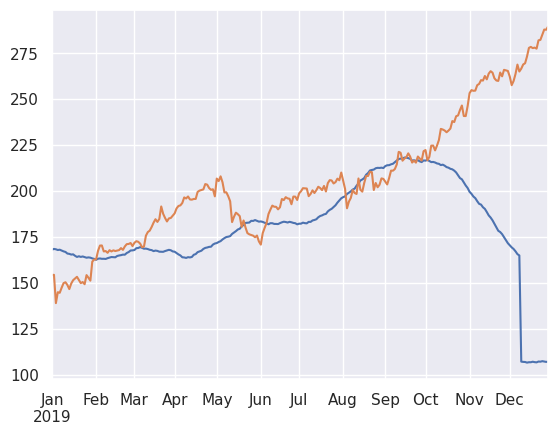

In [ ]:
predicted_data_test.plot(y="Adj Close")
testData["Adj Close"].plot()

<Axes: >

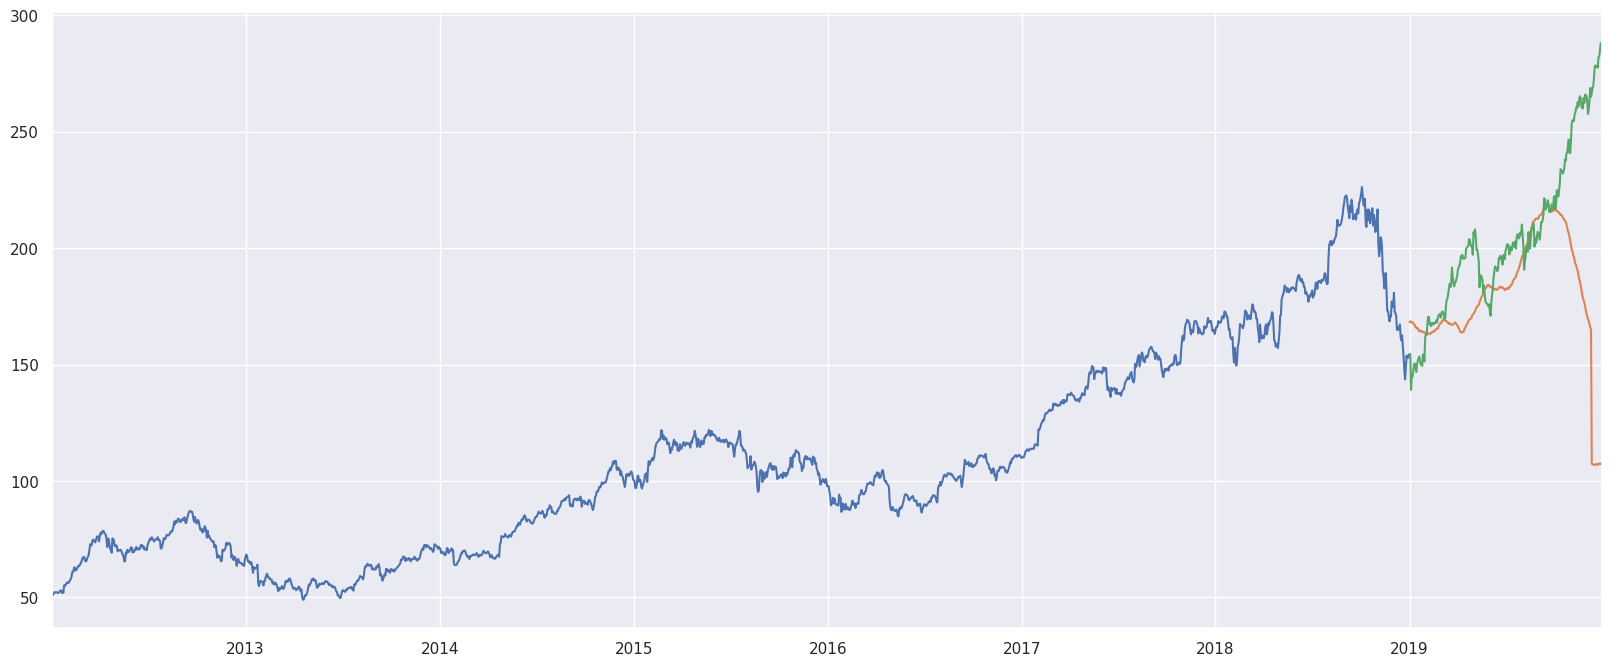

In [ ]:
trainData['Adj Close'].plot(figsize=(20,8))
predicted_data_test.plot(y="Adj Close")
testData["Adj Close"].plot()

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(trainData, predictData))  

6.914381558056999

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(testData, predicted_data_test))

51.04938452812446

In [ ]:
result_additive[1]

4.5733821965837213e-20

In [ ]:
residuals=decompose_additive.resid.dropna()

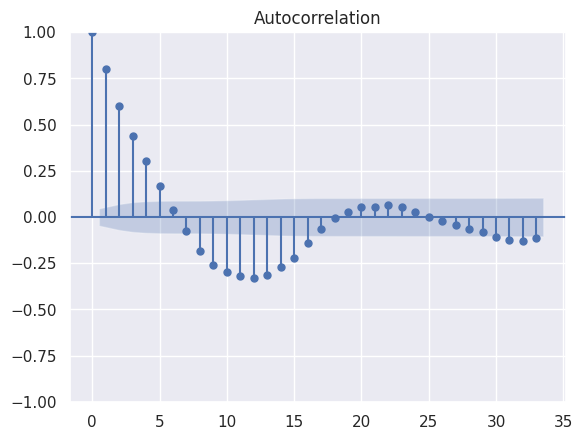

In [ ]:
acf=plot_acf(residuals)

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


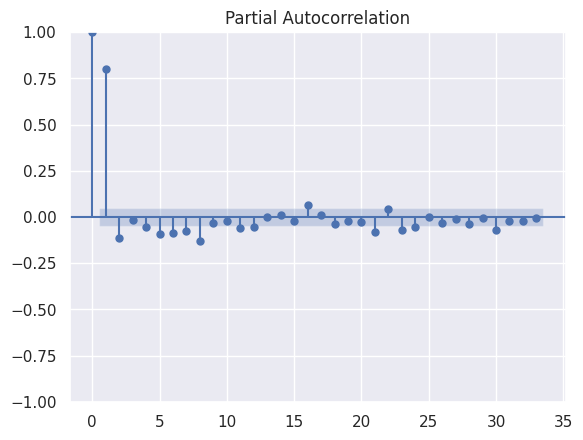

In [ ]:
pacf=plot_pacf(residuals)

In [ ]:
model=ARIMA(decompose_additive.resid,order=(13,0,5))
model_fit=model.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zero

In [ ]:
decompose_additive.trend.fillna(decompose_additive.trend.mean(),inplace=True)

In [ ]:
predictData=predict_train_resid+decompose_additive.trend+decompose_additive.seasonal

<Axes: >

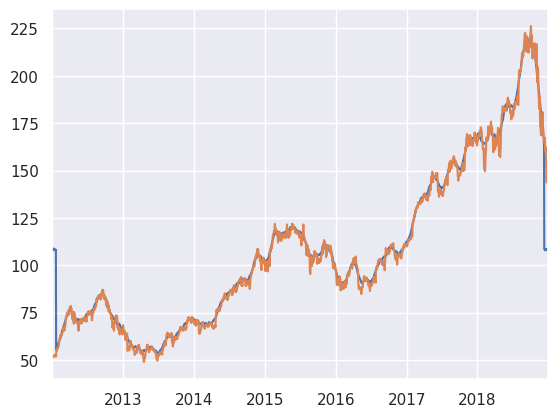

In [ ]:
predictData.plot(y="Adj Close")
trainData['Adj Close'].plot()

In [ ]:
predict_test_resid=model_fit.predict(min(testData.index),max(testData.index))

In [ ]:
trend_test=decompose_additive.trend[(-len(predict_test_resid)):]

In [ ]:
seasonal_test=decompose_additive.seasonal[(-len(predict_test_resid)):]

In [ ]:
test_predict=pd.DataFrame({"trend":trend_test,"seasonal":seasonal_test,"Date":predict_test_resid.index})

In [ ]:
test_predict.set_index('Date',inplace=True)

In [ ]:
predicted_data_test=predict_test_resid+test_predict['trend']+test_predict['seasonal']

<Axes: >

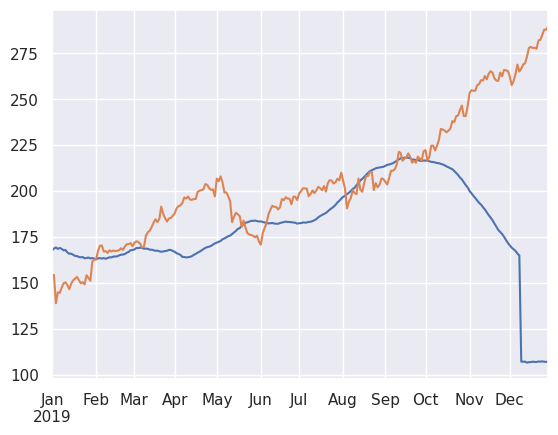

In [ ]:
predicted_data_test.plot(y="Adj Close")
testData["Adj Close"].plot()

<Axes: >

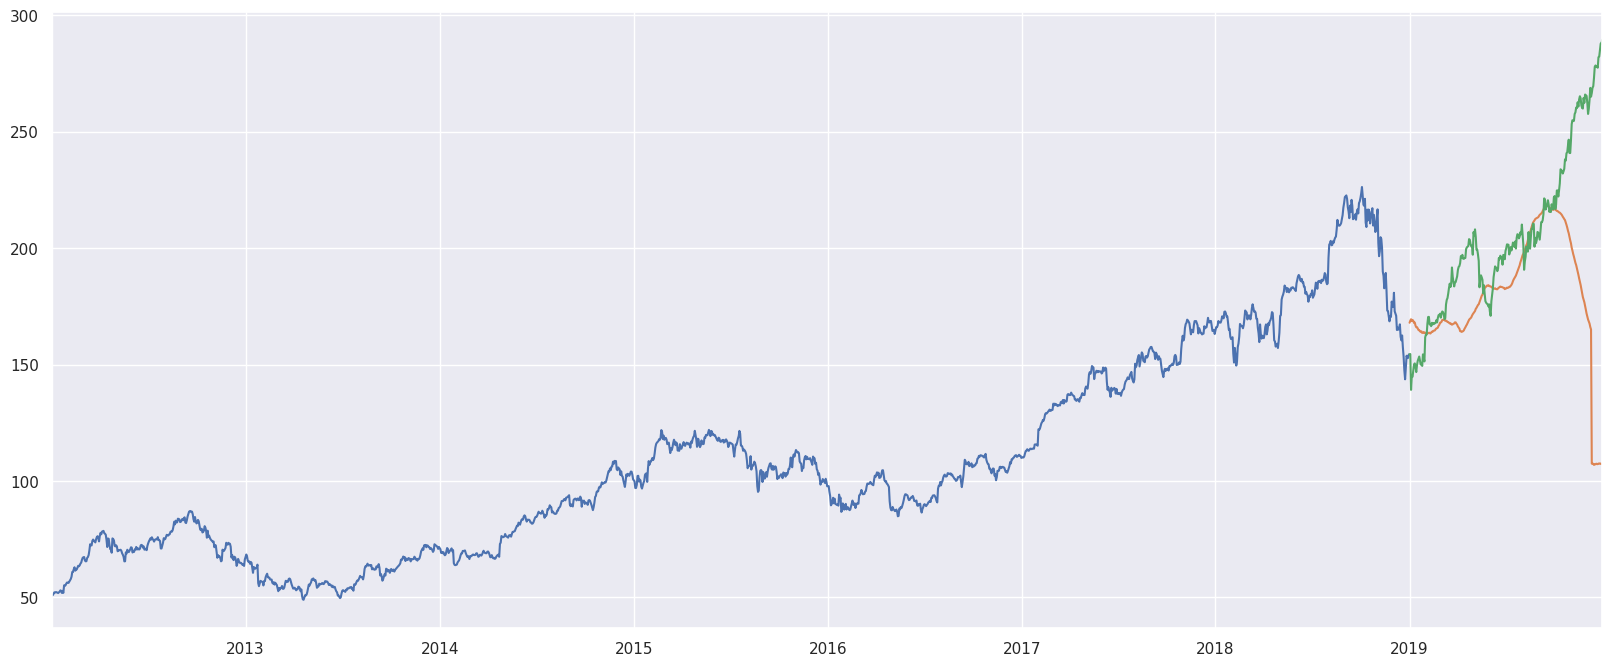

In [ ]:
trainData['Adj Close'].plot(figsize=(20,8))
predicted_data_test.plot(y="Adj Close")
testData["Adj Close"].plot()

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(trainData, predictData))  

7.3097519780258775

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(testData, predicted_data_test))

50.97828478243122

In [ ]:
adfuller(decompose_multiplicative.seasonal)[1]

0.0

seasonal data is complitely stationary lets plot acf and pacf

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


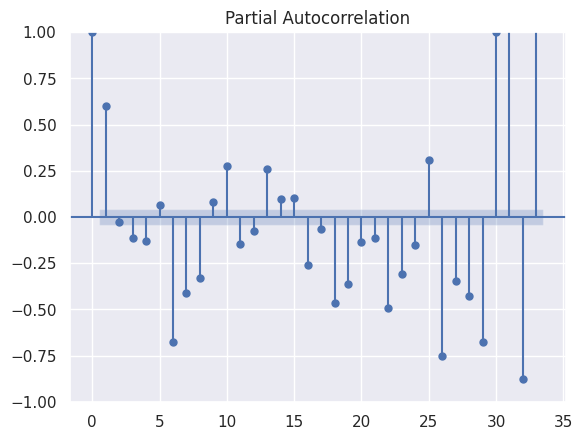

In [ ]:
pacf=plot_pacf(decompose_multiplicative.seasonal)

P=32

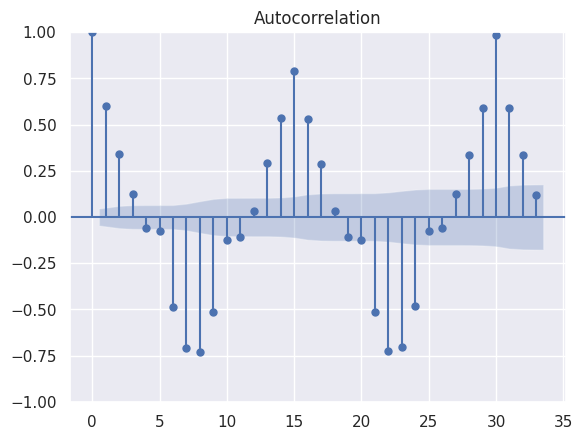

In [ ]:
acf=plot_acf(decompose_multiplicative.seasonal)

Q=24

m=35

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
m = 240
alpha = 1/(2*m)
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
smmodel=SimpleExpSmoothing(trainData['Adj Close']).fit(smoothing_level=alpha)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


In [ ]:
smmodel.summary()

Dep. Variable:,Adj Close,No. Observations:,1825
Model:,SimpleExpSmoothing,SSE,1641092.414
Optimized:,True,AIC,12416.806
Trend:,None,BIC,12427.824
Seasonal:,None,AICC,12416.828
Seasonal Periods:,None,Date:,"Mon, 03 Apr 2023"
Box-Cox:,False,Time:,21:50:13
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0020833,alpha,False
initial_level,79.329872,l.0,True


In [ ]:
predictTrainSM=smmodel.predict(min(trainData.index),max(trainData.index))

<Axes: >

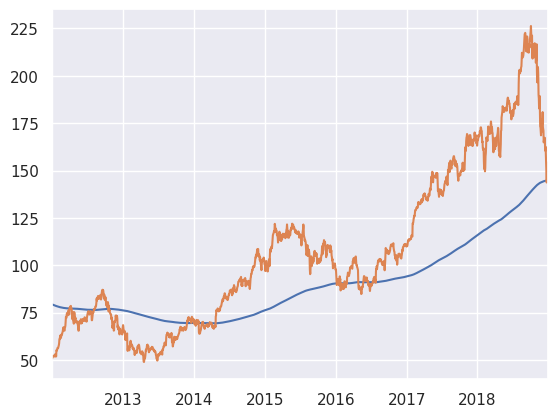

In [ ]:
predictTrainSM.plot()
trainData["Adj Close"].plot()

In [ ]:
predictTestSM=smmodel.predict(min(testData.index),max(testData.index))

<Axes: >

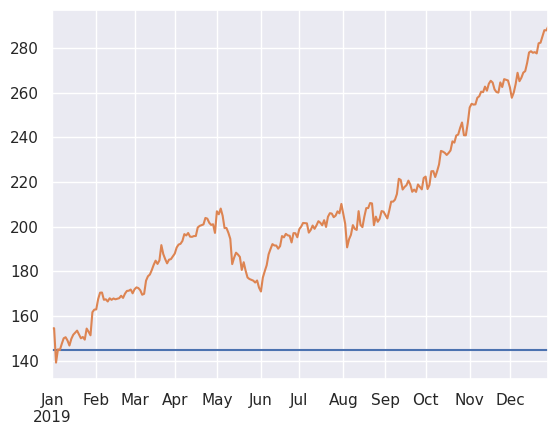

In [ ]:
predictTestSM.plot()
testData["Adj Close"].plot()

In [ ]:
mse = mean_squared_error(trainData['Adj Close'],predictTrainSM)
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(trainData['Adj Close'],predictTrainSM)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(trainData['Adj Close'],predictTrainSM)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  899.2287198948139
Root Mean Squared Error (RMSE) =  29.99
Mean Absolute Error (MAE)  =  22.98305139987272
Mean Absolute Percentage Error (MAPE)  =  0.19395818820232644


In [ ]:
mse = mean_squared_error(testData['Adj Close'],predictTestSM)
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(testData['Adj Close'],predictTestSM)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(testData['Adj Close'],predictTestSM)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  4856.4541883318625
Root Mean Squared Error (RMSE) =  69.69
Mean Absolute Error (MAE)  =  60.35554125319693
Mean Absolute Percentage Error (MAPE)  =  0.274435363713565


In [ ]:
m = 20
alpha = 1/(2*m)
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
smmodel=SimpleExpSmoothing(trainData['Adj Close']).fit(smoothing_level=alpha)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


In [ ]:
smmodel.summary()

Dep. Variable:,Adj Close,No. Observations:,1825
Model:,SimpleExpSmoothing,SSE,135110.013
Optimized:,True,AIC,7859.730
Trend:,None,BIC,7870.748
Seasonal:,None,AICC,7859.752
Seasonal Periods:,None,Date:,"Tue, 04 Apr 2023"
Box-Cox:,False,Time:,04:53:18
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0250000,alpha,False
initial_level,61.468886,l.0,True


In [ ]:
predictTrainSM=smmodel.predict(min(trainData.index),max(trainData.index))

<Axes: >

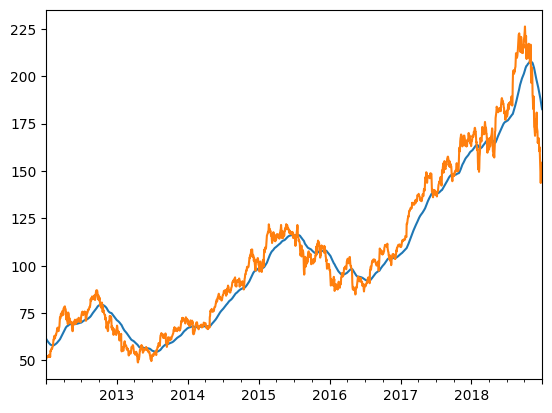

In [ ]:
predictTrainSM.plot()
trainData["Adj Close"].plot()

In [ ]:
predictTestSM=smmodel.predict(min(testData.index),max(testData.index))

<Axes: >

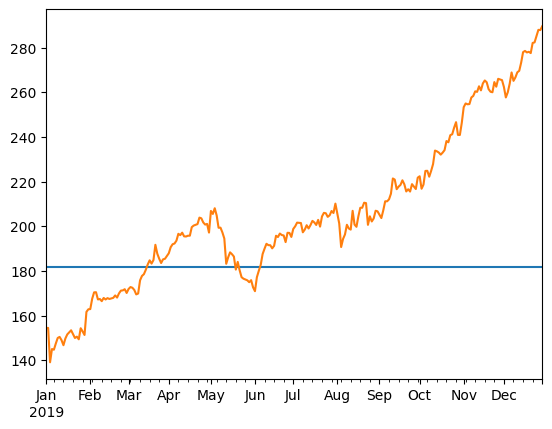

In [ ]:
predictTestSM.plot()
testData["Adj Close"].plot()

In [ ]:
mse = mean_squared_error(trainData['Adj Close'],predictTrainSM)
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(trainData['Adj Close'],predictTrainSM)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(trainData['Adj Close'],predictTrainSM)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  74.03288401345145
Root Mean Squared Error (RMSE) =  8.6
Mean Absolute Error (MAE)  =  6.590865741724038
Mean Absolute Percentage Error (MAPE)  =  0.062328355528743676


In [ ]:
mse = mean_squared_error(testData['Adj Close'],predictTestSM)
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(testData['Adj Close'],predictTestSM)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(testData['Adj Close'],predictTestSM)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  1755.603167724008
Root Mean Squared Error (RMSE) =  41.9
Mean Absolute Error (MAE)  =  31.80161756698396
Mean Absolute Percentage Error (MAPE)  =  0.1429610758232284


In [ ]:
emamodel=ExponentialSmoothing(trainData['Adj Close'],trend='mul',seasonal='mul',seasonal_periods=360).fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [ ]:
emamodel.summary()

Dep. Variable:,Adj Close,No. Observations:,1825
Model:,ExponentialSmoothing,SSE,4172.613
Optimized:,True,AIC,2237.207
Trend:,Multiplicative,BIC,4242.605
Seasonal:,Multiplicative,AICC,2421.462
Seasonal Periods:,360,Date:,"Tue, 04 Apr 2023"
Box-Cox:,False,Time:,05:00:49
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9950027,alpha,True
smoothing_trend,0.0007464,beta,True


In [ ]:
predictTrainSM=emamodel.predict(min(trainData.index),max(trainData.index))

<Axes: >

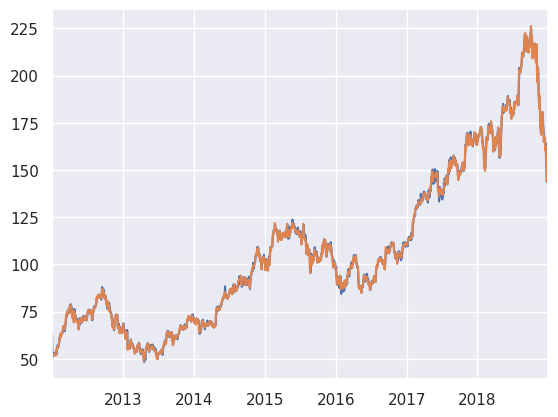

In [ ]:
predictTrainSM.plot()
trainData["Adj Close"].plot()

In [ ]:
predictTestSM=emamodel.predict(min(testData.index),max(testData.index))

<Axes: >

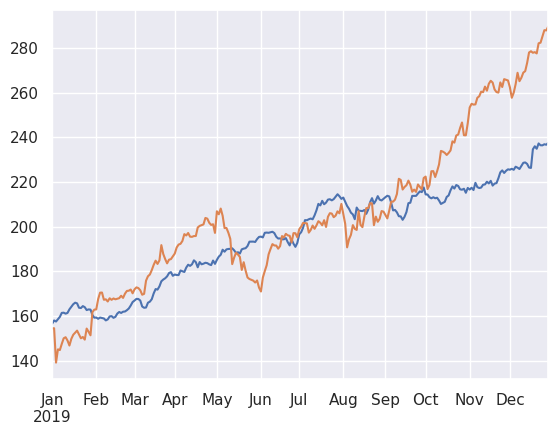

In [ ]:
predictTestSM.plot()
testData["Adj Close"].plot()

In [ ]:
mse = mean_squared_error(trainData['Adj Close'],predictTrainSM)
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(trainData['Adj Close'],predictTrainSM)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(trainData['Adj Close'],predictTrainSM)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  2.286363477643113
Root Mean Squared Error (RMSE) =  1.51
Mean Absolute Error (MAE)  =  1.0796632851246957
Mean Absolute Percentage Error (MAPE)  =  0.010971651397669186


In [ ]:
mse = mean_squared_error(testData['Adj Close'],predictTestSM)
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(testData['Adj Close'],predictTestSM)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(testData['Adj Close'],predictTestSM)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  409.0259668215695
Root Mean Squared Error (RMSE) =  20.22
Mean Absolute Error (MAE)  =  15.277698298585308
Mean Absolute Percentage Error (MAPE)  =  0.06956358500251844


<Axes: >

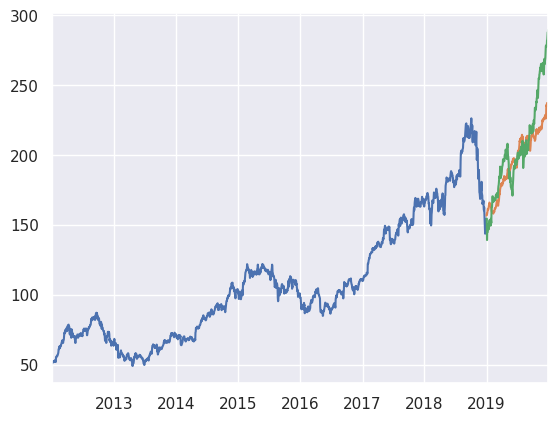

In [ ]:
trainData["Adj Close"].plot()
predictTestSM.plot()
testData["Adj Close"].plot()

In [ ]:
import pickle

pickle.dump(emamodel, open('model.pkl', 'wb'))

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(trainData, model='additive',period=240)

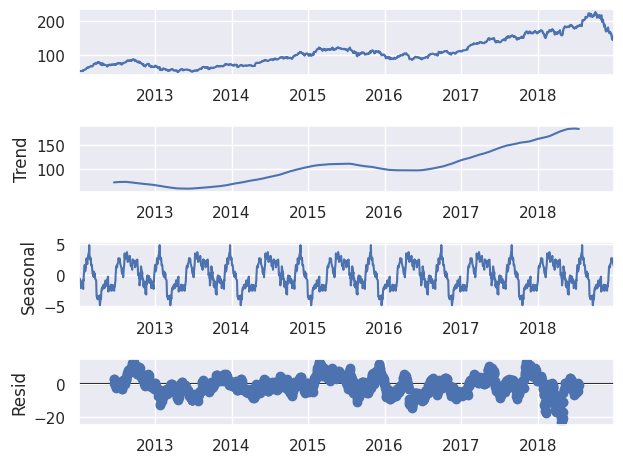

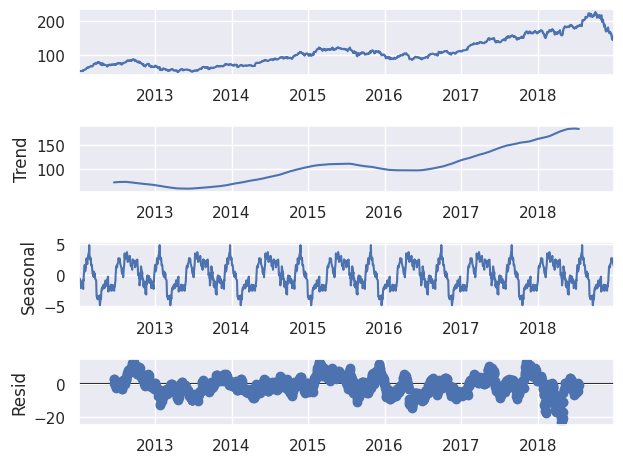

In [ ]:
decomposition.plot()

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


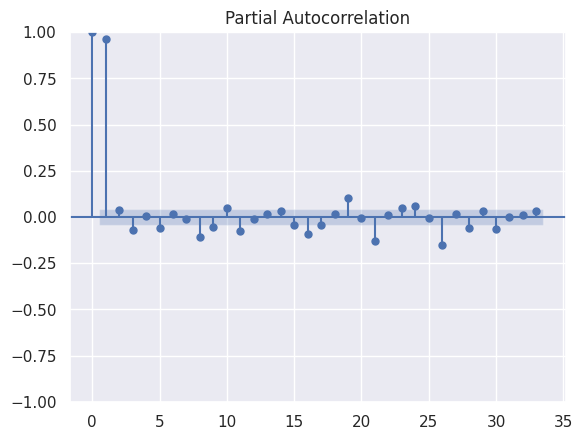

In [ ]:
pacf=plot_pacf(decomposition.seasonal)

P=1

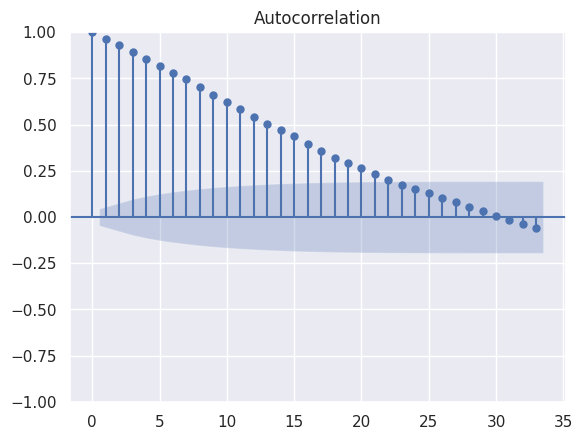

In [ ]:
pacf=plot_acf(decomposition.seasonal)

Q=21

In [ ]:
! pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima_model = SARIMAX(trainData,
                       order=(1,1,1),
                       seasonal_order=(1,0,1,20))

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


In [ ]:
results = sarima_model.fit()

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Adj Close   No. Observations:                 1825
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 20)   Log Likelihood               -3604.772
Date:                            Tue, 04 Apr 2023   AIC                           7219.544
Time:                                    04:45:52   BIC                           7247.088
Sample:                                01-03-2012   HQIC                          7229.704
                                     - 12-31-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4972      0.143     -3.468      0.001      -0.778      -0.216
ma.L1          0.5563      0.139      3.992      0.000       0.283       0.829
ar.S.L20       0.2738      0.231      1.185      0.236      -0.179       0.727
ma.S.L20      -0.1977      0.236     -0.837      0.403      -0.661       0.265
sigma2         3.0485      0.048     63.377      0.000       2.954       3.143
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):              4152.15
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               4.14   Skew:                            -0.48
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
predict_train=results.predict(min(trainData.index),max(trainData.index))

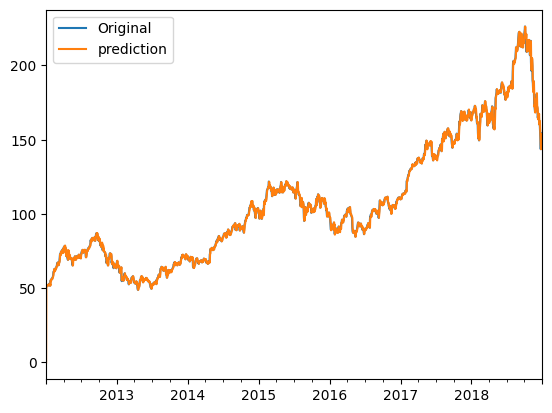

In [ ]:
trainData["Adj Close"].plot(label="Original")
predict_train.plot(label="prediction")
plt.legend(loc="best")
plt.show()

In [ ]:
predict_test=results.predict(min(testData.index),max(testData.index))

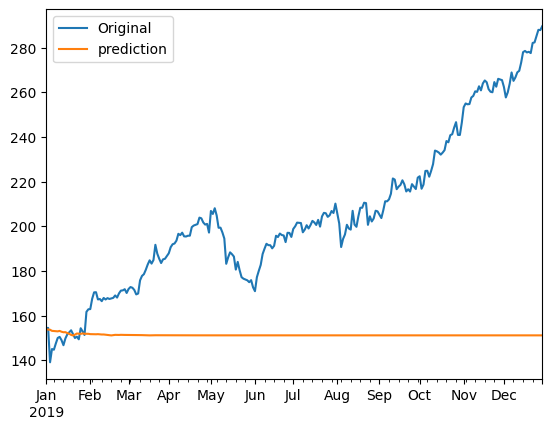

In [ ]:
testData["Adj Close"].plot(label="Original")
predict_test.plot(label="prediction")
plt.legend(loc="best")
plt.show()

In [ ]:
np.sqrt(mean_squared_error(trainData,predict_train))

2.11164024201525

In [ ]:
np.sqrt(mean_squared_error(testData,predict_test))

64.24208216947513